In [8]:
#Charging all necesary data
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_A = pd.read_csv('AEP_daily.csv')
df_A ['Datetime']= pd.to_datetime(df_A['Datetime'])
df_A = df_A.set_index('Datetime')

def series_to_array(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1] #reshape to  list
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

pasos = 5
x = series_to_array(df_A, pasos) 

df_A_copy = df_A.copy()
df_A_values = df_A_copy.drop(df_A_copy.index[0:pasos],axis=0) 

In [9]:
#Determine number of clusters made by Affinity Propagation
AP = AffinityPropagation(random_state = 10).fit(x)
n_clusters_ = len(AP.cluster_centers_indices_)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 123


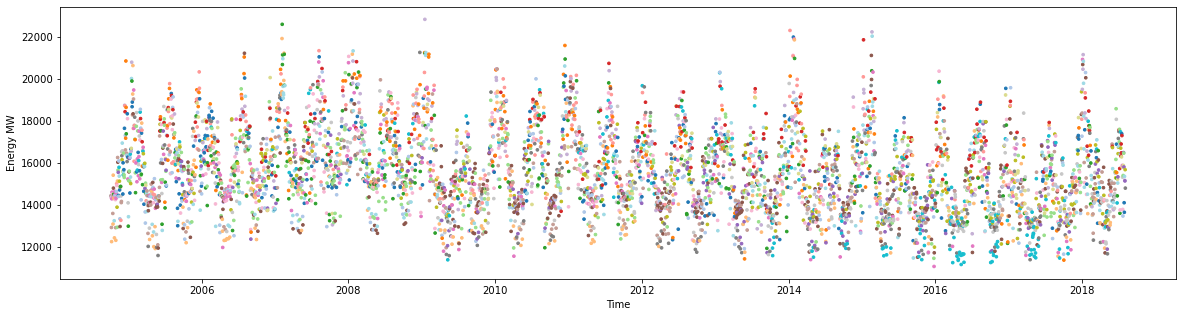

In [10]:
#Visualization accordingly to estimated clusters in all data
AP_predict = AP.predict(x) 

plt.figure(figsize=(20,5))
plt.scatter(df_A_values.index, df_A_values['AEP_MW'], c=AP_predict, cmap='tab20', s=7)
plt.xlabel('Time')
plt.ylabel('Energy MW')
plt.show()

In [18]:
############# APPLYING PCA

In [12]:
scaler = StandardScaler()
AEP_s = scaler.fit_transform(x) #Standarize values to do not desprecite values

In [13]:
AEP_PCA = PCA()
AEP_PCA.fit(AEP_s) #Use PCA

AEP_PCA.explained_variance_ratio_ #To visualize which columns are more significant

array([0.7627629 , 0.14095688, 0.06470385, 0.02340422, 0.00817215])

In [14]:
AEP_PCA = PCA(n_components = 2)
AEP_PCA.fit(AEP_s) #Adjust to 2D

PCA(n_components=2)

In [15]:
AEP_results = AEP_PCA.transform(AEP_s) #Values of 2D

In [16]:
x_PCA = pd.DataFrame(AEP_results)
x_PCA.columns = ['One', 'Two']

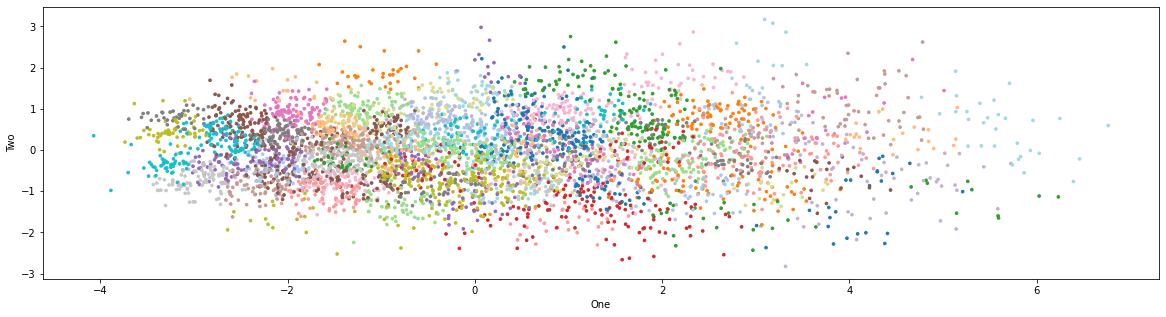

In [17]:
#Visualize PCA
plt.figure(figsize=(20,5))
plt.scatter(x_PCA['One'], x_PCA['Two'], c=AP_predict, cmap='tab20', s=7)
plt.xlabel('One')
plt.ylabel('Two')
plt.show()

In [ ]:
############

In [33]:
#Charging data necessary for a 3-year analysis with a reduced windows to verify how number of clusters varied 
df_A_values_3 = df_A_values.loc['2006':'2009']

pasos = 3
x_3 = series_to_array(df_A_values_3, pasos)

df_A_3_copy = df_A_values_3.copy()
df_A_values3 = df_A_3_copy.drop(df_A_3_copy.index[0:pasos],axis=0) # to get same rows while graphing

In [34]:
#Ensuering the number of clusters do not varite besides the reductions of data
AP = AffinityPropagation(random_state = 10).fit(x_3)
n_clusters_ = len(AP.cluster_centers_indices_)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 48


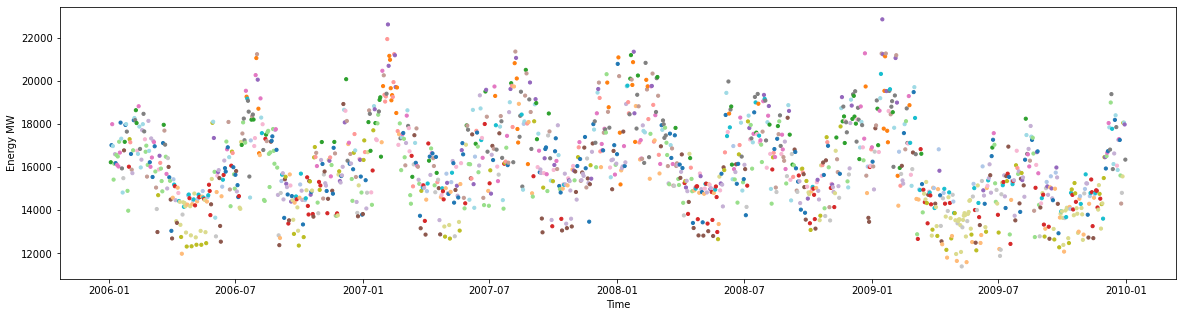

In [35]:
#Visualization
AP_predict_3 = AP.predict(x_3) 

plt.figure(figsize=(20,5))
plt.scatter(df_A_values3.index, df_A_values3['AEP_MW'], c=AP_predict_3, cmap='tab20', s=10)
plt.xlabel('Time')
plt.ylabel('Energy MW')
plt.show()